In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reads the data from the UCI Machine Learning Repository as a pandas DataFrame
dataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data")
# Names the columns of the pandas DataFrame 
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']
dataset.columns = columns

In [3]:
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [4]:
# Prints the number of rows for each class label
print(dataset["class"].value_counts())
# Computes the percentage of the edible class 
round(dataset["class"].value_counts()[0]/(dataset["class"].value_counts()[0]
                                    + dataset["class"].value_counts()[1])*100, 2)

e    4208
p    3915
Name: class, dtype: int64


51.8

We can see there is a good balance of the two class labels across the samples.

Mushroom Features: ([good domain knowledge overview](https://datascienceplus.com/mushrooms-classification-part-1/))

![m](https://www.english-online.at/biology/mushrooms/parts-of-a-mushroom.gif) 

`cap-shape`: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s. ![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-cap-shape.jpg)

`cap-surface`: fibrous=f,grooves=g,scaly=y,smooth=s ![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-cap-surface.jpg)

`cap-color`: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y.

`bruises`: bruises=t,no=f. While identifying mushrooms, check for [bruising]((https://www.mushroom-appreciation.com/identifying-mushrooms.html) by nicking the top and bottom of the cap and watching for any color change.  

`odor`: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s. 

`gill-attachment`: attached=a,descending=d,free=f,notched=n. ![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-gill-attachment.jpg)

`gill-spacing`: close=c,crowded=w,distant=d. ![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-gill-spacing.jpg)

`gill-color`: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y. 

`stalk-shape`: enlarging=e,tapering=t.   

`stalk-root`: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?. ![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-stalk.jpg)

`stalk-surface-above-ring`: fibrous=f,scaly=y,silky=k,smooth=s.  

`stalk-surface-below-ring`: fibrous=f,scaly=y,silky=k,smooth=s.  

`stalk-color-above-ring`: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y.  

`stalk-color-below-ring`: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y.  

`veil-type`: partial=p,universal=u. Tissue that connects the stem and the cap before the gills are exposed. ![m](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b7/1797-09-03_Agaricus_campestris_Plate_by_James_Sowerby.jpg/640px-1797-09-03_Agaricus_campestris_Plate_by_James_Sowerby.jpg)  

`veil-color`: brown=n,orange=o,white=w,yellow=y.

`ring-number`: none=n,one=o,two=t.

`ring-type`: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z. ![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-ring-type.jpg)  

`spore-print-color`:  black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y. For most mushrooms, if the cap is cut off and placed gill-side-down overnight, a powdery impression reflecting the shape of the gills (or pores, or spines, etc.) is formed (when the fruit body is sporulating). The color of the powdery print, called a spore print, is used to help classify mushrooms and can help to identify them.  

`population`: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y.  

`habitat`: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d. 


In [5]:
# Replaces "?" (UCI ML missing values are denoted by a question mark) with np.NaN
# across all datapoints of dataset
dataset.replace('?', np.NaN, inplace=True)
# Gets the number of missing values on each column
dataset.isna().sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

As we can see, the only column with missing values is `stalk-root`. This is basically the type of root `stalk-root`: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?. ![m](https://datascienceplus.com/wp-content/uploads/2018/02/mushroom-stalk.jpg). 

In [6]:
# Computes the contingency table for stalk-root and the class labels
stalk_root_edibility_table = pd.crosstab(index=dataset["class"], columns=dataset["stalk-root"])
stalk_root_edibility_table

stalk-root,b,c,e,r
class,,,,
e,1920,512,864,192
p,1856,44,255,0


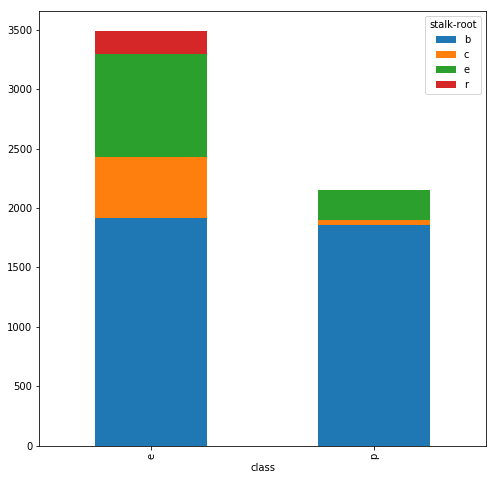

In [7]:
# Plots a stacked column chart for each class label 
stalk_root_edibility_table.plot(kind="bar", figsize=(8,8),stacked=True)
plt.show() 

In [8]:
# Subsets the dataset between the edible and the poisonous class labels
dataset_p = dataset[dataset["class"] == "p"]
dataset_e = dataset[dataset["class"] == "e"] 

In [9]:
print(" poison")
print(dataset_p["stalk-root"].value_counts())
print("\n", "not poison")
print(dataset_e["stalk-root"].value_counts())

 poison
b    1856
e     255
c      44
Name: stalk-root, dtype: int64

 not poison
b    1920
e     864
c     512
r     192
Name: stalk-root, dtype: int64


Based on this, we can see that `stalk-root` is probably not one of the most powerfult predictors. The bulbous roots have the same proportion of class labels, and while the equal and club stalks are more prevalent on the edible mushrooms, it shouldn't make much of a difference on the machine learning process. However, we can see that all the rooted mushrooms are edible, but the sample size is not big enough (about 2.3% of the total sample size) to be relevant. We could run a $\chi^2$-test, but it would not really shed much more light in the matter. Instead, we will implement our models on slightly different datasets and compare them. 

1. Dataset without column `stalk-root`.
2. Raw dataset with `?` as `np.NaN`.
3. Raw dataset (treating `?` as possible value of `stalk-root`).
4. Dataset without rows with missing values (losing 30% of our data).

We could also impute the missing values by mode imputation

In [10]:
dataset["stalk-root"].value_counts()

b    3776
e    1119
c     556
r     192
Name: stalk-root, dtype: int64

In [11]:
# Imputes the missing values on the dataset
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
dataset_imputed = pd.DataFrame(imp.fit_transform(dataset), columns = columns)

In [12]:
dataset_imputed["stalk-root"].value_counts()

b    6256
e    1119
c     556
r     192
Name: stalk-root, dtype: int64

but this is not a very good approach as the other values don't play any roll in the matter. A better approach would be to impute all classes on the same proportion as the non-missing data.

In [13]:
# Subsets the dataset to only get the rows with missing values
dataset_stalk_root_nan = dataset.iloc[dataset["stalk-root"][
    dataset["stalk-root"].isna()
].index]

In [14]:
dataset_stalk_root_nan["class"].value_counts()

p    1760
e     720
Name: class, dtype: int64

We can see that the rows with missing values consist of 2.44 times more poisonous class than edible. Thus, we are going to take this into account. Out of all the missing rows, 29 % will need to have the `dataset_e["stalk-root"].value_counts()` distribution, while 71% will have the `dataset_p["stalk-root"].value_counts()` distribution. 

In [15]:
number_class_b = round(dataset_stalk_root_nan.shape[0]*(
    0.29*(dataset_e["stalk-root"].value_counts()[0]/(
    dataset_e["stalk-root"].value_counts()[0] + dataset_e["stalk-root"].value_counts()[1] +
    dataset_e["stalk-root"].value_counts()[2] + dataset_e["stalk-root"].value_counts()[3])) + 
    0.71 * (dataset_p["stalk-root"].value_counts()[0]/(
    dataset_p["stalk-root"].value_counts()[0] + dataset_p["stalk-root"].value_counts()[1] +
    dataset_p["stalk-root"].value_counts()[2])))) - 1 # to make the rounds make sense

number_class_e = round(dataset_stalk_root_nan.shape[0]*(
    0.29*(dataset_e["stalk-root"].value_counts()[1]/(
    dataset_e["stalk-root"].value_counts()[0] + dataset_e["stalk-root"].value_counts()[1] +
    dataset_e["stalk-root"].value_counts()[2] + dataset_e["stalk-root"].value_counts()[3])) + 
    0.71 * (dataset_p["stalk-root"].value_counts()[1]/(
    dataset_p["stalk-root"].value_counts()[0] + dataset_p["stalk-root"].value_counts()[1] +
    dataset_p["stalk-root"].value_counts()[2]))))

number_class_c = round(dataset_stalk_root_nan.shape[0]*(
    0.29*(dataset_e["stalk-root"].value_counts()[2]/(
    dataset_e["stalk-root"].value_counts()[0] + dataset_e["stalk-root"].value_counts()[1] +
    dataset_e["stalk-root"].value_counts()[2] + dataset_e["stalk-root"].value_counts()[3])) + 
    0.71 * (dataset_p["stalk-root"].value_counts()[2]/(
    dataset_p["stalk-root"].value_counts()[0] + dataset_p["stalk-root"].value_counts()[1] +
    dataset_p["stalk-root"].value_counts()[2]))))

number_class_r = round(dataset_stalk_root_nan.shape[0]*(
    0.29*(dataset_e["stalk-root"].value_counts()[3]/(
    dataset_e["stalk-root"].value_counts()[0] + dataset_e["stalk-root"].value_counts()[1] +
    dataset_e["stalk-root"].value_counts()[2] + dataset_e["stalk-root"].value_counts()[3]))))

Not sure if this make that much sense, I think the change of imputting a wrong missing value is higher than with the mode, where we at least are guranteed to impute a percentage of values correctly (given they follow the same distribution). 